
# Week 1 Lab – Linear Regression with One Feature 




## 1. Setup

In [1]:

# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:

import numpy as np
import matplotlib.pyplot as plt



## 2. Create a Simple Dataset

We will create the two datasets that are given to us this with the purpouse of take the correct results for the example that we have in this case is Just 1 feature and is: Stellar Mas vs Stellar Luminosity (M VS L)


In [70]:
M= [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]

L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]


### 2.1 Visualize the Data

Now We put our datasets in this function for the plot of M VS L

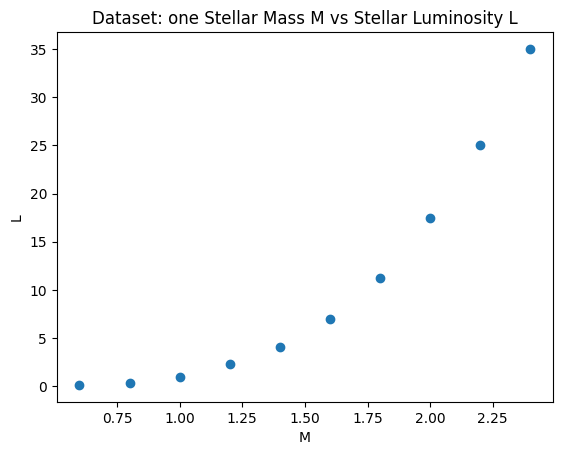

In [71]:

plt.figure()
plt.scatter(M, L)
plt.xlabel("M")
plt.ylabel("L")
plt.title("Dataset: one Stellar Mass M vs Stellar Luminosity L")
plt.show()


## About linearity and plausibility:
####


## 3. Linear Regression Model with One Feature

We use the model (hypothesis function):

$$
f_{w,b}(x^{(i)}) = w x^{(i)} + b
$$

where:
- $w$ is the slope,
- $b$ is the intercept.

### We also have to make M and L a numpy array for the prediction with this:

In [72]:
M= np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])


### This is the firt 5 predictions with w and b test 0.0

In [73]:

def predict(M, w, b):
    return w * M + b

w_test = 0.0
b_test = 0.0
L_hat_test = predict(M, w_test, b_test)
print("First 5 predictions with w=0, b=0:", L_hat_test[:3])



First 5 predictions with w=0, b=0: [0. 0. 0.]



## 4. mean squared error (MSE)

We define the **mean squared error** cost function:

$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)^2
$$

This measures how well the model $f_{w,b}(x) = w x + b$ fits the data.


### In this case x sub i is M and y sub i is L

In [74]:

def compute_cost(M, L, w, b):
    denom = M.shape[0]
    L_hat = w * denom + b
    internal = L_hat - L
    cost = (1 / (2 * denom)) * np.sum(internal ** 2)
    return cost

print("cost with w = 0, b = 0: ", compute_cost(M, L, w_test, b_test))


cost with w = 0, b = 0:  117.69675000000001



### 4.1 Cost Surface

We can visualize how $J(w,b)$ changes as we vary $w$ and $b$.  
Below we plot the **cost surface** $J(w,b)$ in 3D using explicit loops.


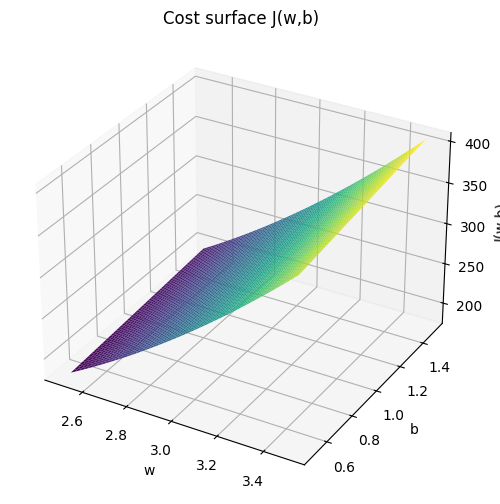

In [75]:

from mpl_toolkits.mplot3d import Axes3D  # needed to register the 3D projection
from matplotlib import cm

# Choose reasonable ranges around the expected optimum
w_values = np.linspace(2.5, 3.5, 1000)
b_values = np.linspace(0.5, 1.5, 1000)

# Build W, B, J_vals as lists of lists using explicit loops
W = []
B = []
J_vals = []

for i in range(len(b_values)):  # rows: b
    row_W = []
    row_B = []
    row_J = []
    for j in range(len(w_values)):  # cols: w
        w_curr = w_values[j]
        b_curr = b_values[i]
        row_W.append(w_curr)
        row_B.append(b_curr)
        j_val = compute_cost(M, L, w_curr, b_curr)
        row_J.append(j_val)
    W.append(row_W)
    B.append(row_B)
    J_vals.append(row_J)

W_arr = np.array(W)
B_arr = np.array(B)
J_arr = np.array(J_vals)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(W_arr, B_arr, J_arr, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()


## About the minimun:
####


## 5. Gradients

We use **gradient descent** with the update rules:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big) x^{(i)}, \quad
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)
$$

Update:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
$$


## Non-Vectorized

In [76]:

def compute_gradients(M_list, L_list, w, b):
    """Compute dJ/dw and dJ/db using explicit loops."""
    m_local = len(M_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * M_list[i] + b
        error = f_wb - L_list[i]
        sum_dw += error * M_list[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)


Gradients at w=0, b=0: -21.523000000000003 -10.36


## Vectorized

In [77]:
def compute_gradients(M, L, w, b):
    m = M.shape[0]
    L_hat = w * M + b  
    errors = L_hat - L


    dj_dw = (1 / m) * np.sum(errors * M)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

Gradients at w=0, b=0: -21.523 -10.36


### 5.1 Implement the Gradient Descent Loop

In [78]:

def gradient_descent(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: w= 0.2152, b= 0.1036, cost= 96.8702
Iteration  200: w= 7.9674, b=-0.0073, cost=2465.7264
Iteration  400: w= 9.7253, b=-2.9093, cost=3590.6313
Iteration  600: w=11.1759, b=-5.3129, cost=4680.3049
Iteration  800: w=12.3762, b=-7.3015, cost=5692.6462
Iteration 1000: w=13.3693, b=-8.9470, cost=6606.0789
Iteration 1200: w=14.1910, b=-10.3085, cost=7413.7630
Iteration 1400: w=14.8709, b=-11.4350, cost=8117.5805
Iteration 1600: w=15.4334, b=-12.3670, cost=8724.2512
Iteration 1800: w=15.8989, b=-13.1383, cost=9242.8696

Learned parameters:
w = 16.2822484076734
b = -13.77345340049044



## 6. Convergence 
plot loss vs iterations, and comment on convergence speed and stability.



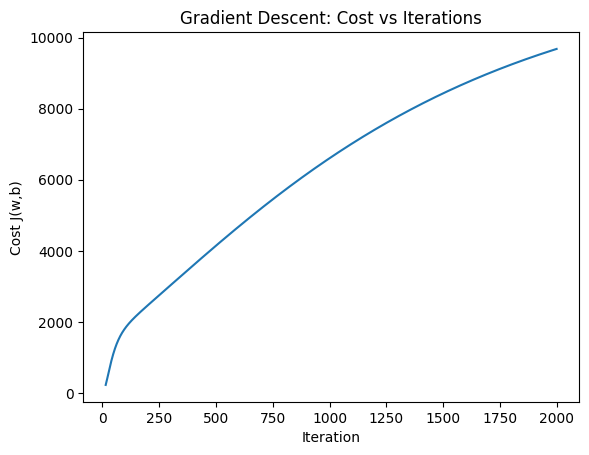

In [79]:
iterations = [it for it, c in history]
costs = [c for it, c in history]

plt.figure()
plt.plot(iterations[15:], costs[15:])
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

## 7. Experiments

In [84]:
num_iterations_experiments = 2000
learning_rates = [0.1, 0.5, 0.001]

w_lr01, b_lr01, history_lr01 = gradient_descent(M, L, w_init, b_init, learning_rates[0], num_iterations_experiments)
print("\nLearned parameters with learning_rate = 0.1:")
print("w =", w_lr01)
print("b =", b_lr01) 

w_lr05, b_lr05, history_lr05 = gradient_descent(M, L, w_init, b_init, learning_rates[1], num_iterations_experiments)
print("\nLearned parameters with learning_rate = 0.5:")
print("w =", w_lr05)
print("b =", b_lr05) 

w_lr001, b_lr001, history_lr001 = gradient_descent(M, L, w_init, b_init, learning_rates[2], num_iterations_experiments)
print("\nLearned parameters with learning_rate = 0.001:")
print("w =", w_lr001)
print("b =", b_lr001) 

Iteration    0: w= 2.1523, b= 1.0360, cost=138.4398
Iteration  200: w=16.3146, b=-13.8270, cost=9718.7784
Iteration  400: w=17.8595, b=-16.3867, cost=11592.9136
Iteration  600: w=18.0899, b=-16.7685, cost=11886.7143
Iteration  800: w=18.1243, b=-16.8255, cost=11930.8568
Iteration 1000: w=18.1294, b=-16.8340, cost=11937.4486
Iteration 1200: w=18.1302, b=-16.8352, cost=11938.4320
Iteration 1400: w=18.1303, b=-16.8354, cost=11938.5787
Iteration 1600: w=18.1303, b=-16.8354, cost=11938.6006
Iteration 1800: w=18.1303, b=-16.8355, cost=11938.6038

Learned parameters with learning_rate = 0.1:
w = 18.130302963272232
b = -16.835454434392684
Iteration    0: w=10.7615, b= 5.1800, cost=5310.4966
Iteration  200: w=18.1296, b=-16.8343, cost=11937.6817
Iteration  400: w=18.1303, b=-16.8355, cost=11938.6043
Iteration  600: w=18.1303, b=-16.8355, cost=11938.6044
Iteration  800: w=18.1303, b=-16.8355, cost=11938.6044
Iteration 1000: w=18.1303, b=-16.8355, cost=11938.6044
Iteration 1200: w=18.1303, b=-16.

## 8. Final Pit Plot

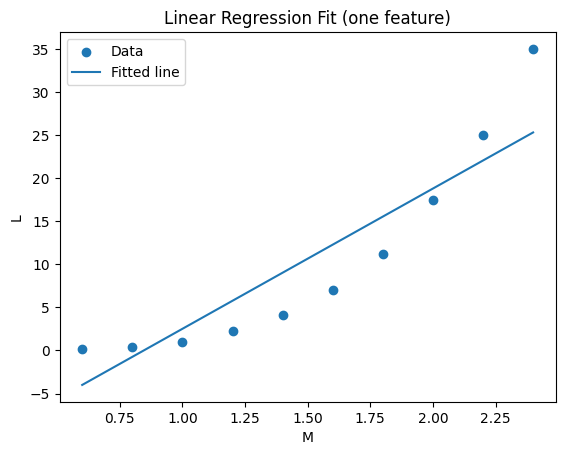

In [85]:
plt.figure()
plt.scatter(M, L, label="Data")
y_pred = predict(M, w_learned, b_learned)
plt.plot(M, y_pred, label="Fitted line")
plt.xlabel("M")
plt.ylabel("L")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()


## Conceptual Questions:
